<a href="https://colab.research.google.com/github/aarushkote/Myprojects/blob/main/BML_LCA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving data.csv to data.csv


Accuracy: 0.7778566359119943

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  T

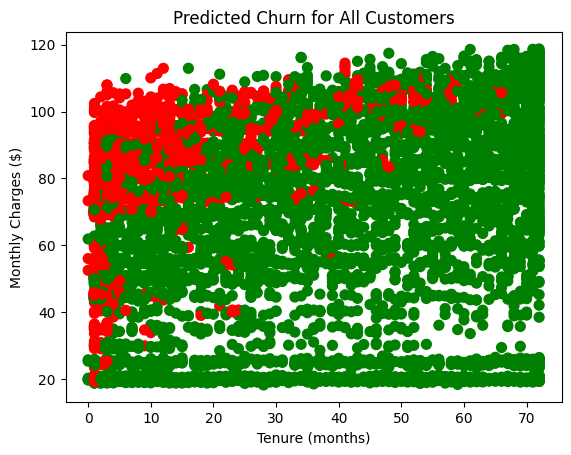

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

X = data[['tenure','MonthlyCharges']]
y = data['Churn'].map({'Yes':1,'No':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

print("\nFirst 5 rows of the dataset:")
print(data.head())
print("\nChurn value counts:")
print(data['Churn'].value_counts())

data['Predicted Churn'] = pd.Series(model.predict(X)).map({1:'Yes',0:'No'})

print("\n Predictions for customers:")
print(data[['tenure','MonthlyCharges','Predicted Churn']].head(10))

plt.scatter(data['tenure'], data['MonthlyCharges'],
            c=data['Predicted Churn'].map({'Yes':'red','No':'green'}), s=50)
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.title('Predicted Churn for All Customers')
plt.show()
